# Duffing Oscillator

The Duffing Oscillator is a model of a driven iron pendulum between two magnets. The model is:

$m\ddot{x} = -\gamma\dot{x} + 2ax - 4bx^3 + F_0\cos{\omega t}$

In this notebook the constants will be taken as:

$m = 1, F_0 = \frac{1}{2}, \omega = 1.2, \gamma = 0.3, a = \frac{1}{2}, b = \frac{1}{4}$

### A simple solution

Here the RK4 method is applied to get numerical solutions to the equations.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#constants
m = 1
F_0 = .5
omega = 1.2   
gamma = 0.3
a = 1/2
b = 1/4

#simulation parameter
h = .001
numberOfRuns = 10**6

#iterator
def iterateRK4(t_n,y_n,f):
    """ 
    Finds y(t_n+h) for the equation dy/dt = f(t,y) via RK4 method.
    """
    k_1 = f(t_n, y_n)
    k_2 = f(t_n + h/2, y_n + h*k_1/2)
    k_3 = f(t_n + h/2, y_n + h*k_2/2)
    k_4 = f(t_n + h, y_n + h*k_3)

    return y_n + h*(k_1 + 2*k_2 + 2*k_3 + k_4)/6

#f(t,y) function , y = np.array([x,p])
def f(t,R):
    """
    Returns the f(t,R) vector for the duffing oscillator.
    """
    x = R[0]
    p = R[1]
    f_x = p/m
    f_p = -(gamma*p)/m + 2*a*x - 4*b*(x**3) + (F_0)*np.cos(omega*t)
    return np.array([f_x,f_p])

def simulateDuffing(RState):
    """
    Uses RK4 method to find a set of points on the solution to the duffing eq given an intial condition.
    """
    RStates = [RState]
    tStates = [0]

    for x in range(numberOfRuns):
        RStates.append(iterateRK4(tStates[-1],RStates[-1],f))
        tStates.append(tStates[-1]+h)
    return tStates, RStates

def transformToXP(lst):
    """
    Transfroms [np.array([1,2]),np.array([3,4])] to [[1,3],[2,4]]
    """
    return [[s[c] for s in lst] for c in range(2)]

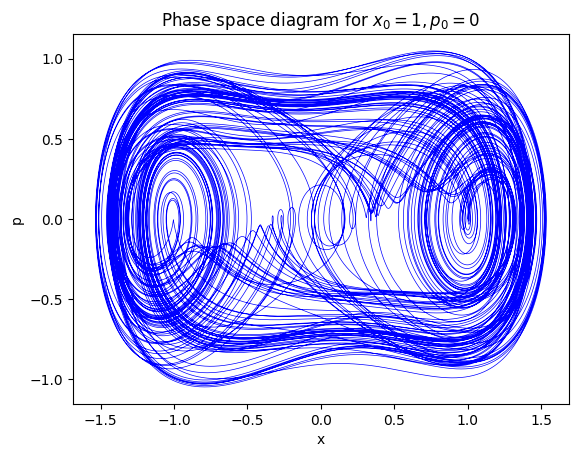

In [126]:
#example simulation
t1, R1 = simulateDuffing(np.array([1,0]))
xR1List = transformToXP(R1)

#graph
plt.plot(xR1List[0], xR1List[1], 'blue',linewidth = '.5')
plt.xlabel("x")
plt.ylabel("p")
plt.title(r'Phase space diagram for $x_0 = 1, p_0 = 0$')
plt.show()

### Strange Attractor

The set of points $t_0 + \dfrac{2\pi}{\omega}n$ where $n$ is an integer turn out to form a strange attractor. Due to the limits of my computational power, only a few points on the attractor are found. 

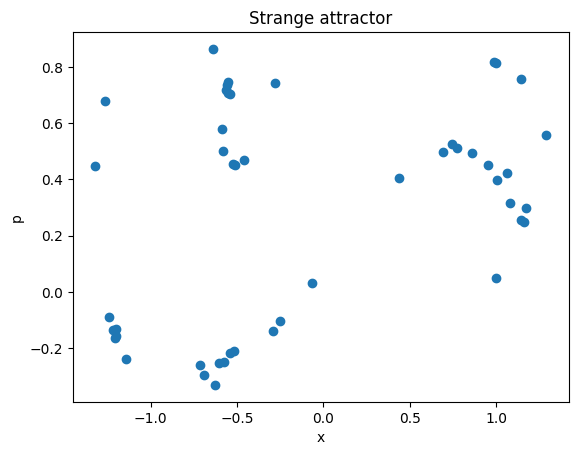

In [127]:
#finds the spacing between elements of the list for each point on the strange attractor
nPeriodic  = int(np.floor(8*np.pi/(omega*h)))

#finds points on the strange attractor
periodicList = []
for i in range(int(np.floor(numberOfRuns/nPeriodic))):
    periodicList.append(R1[i*nPeriodic+ 100])

#transforms list to list of x and p states
xR1ListPeriodic = transformToXP(periodicList)

#plots
plt.scatter(xR1ListPeriodic[0],xR1ListPeriodic[1])
plt.xlabel("x")
plt.ylabel("p")
plt.title(r'Strange attractor')
plt.show()
